/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:269: UserWarning:

No training configuration found in save file: the model was *not* compiled. Compile it manually.



(10000, 28, 28, 1) (10000, 10) [<tf.Tensor 'input_1_17:0' shape=(?, 28, 28, 1) dtype=float32>]


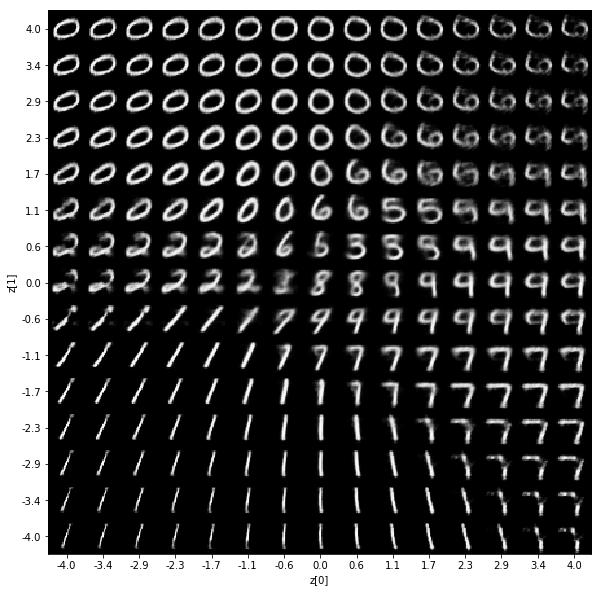

In [17]:
%matplotlib inline
import os
os.environ["WANDB_MODE"] = "dryrun"
import conditional_vae
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

def plot_results(batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder = load_model("encoder.h5")
    decoder = load_model("decoder.h5")
    x_test = conditional_vae.X_test
    y_test = conditional_vae.y_test
    print(x_test.shape, y_test.shape, encoder.inputs)
    filename = os.path.join("digits_over_latent.png")
    # display a 15x15 2D manifold of digits
    n = 15
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()
plot_results()